# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

21:34:38 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=244145;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=611732;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#47\47]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=115274;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=374365;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#68\68]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=508273;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=691184;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

21:34:40 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=262198;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=736855;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

21:34:41 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=685750;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=733688;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

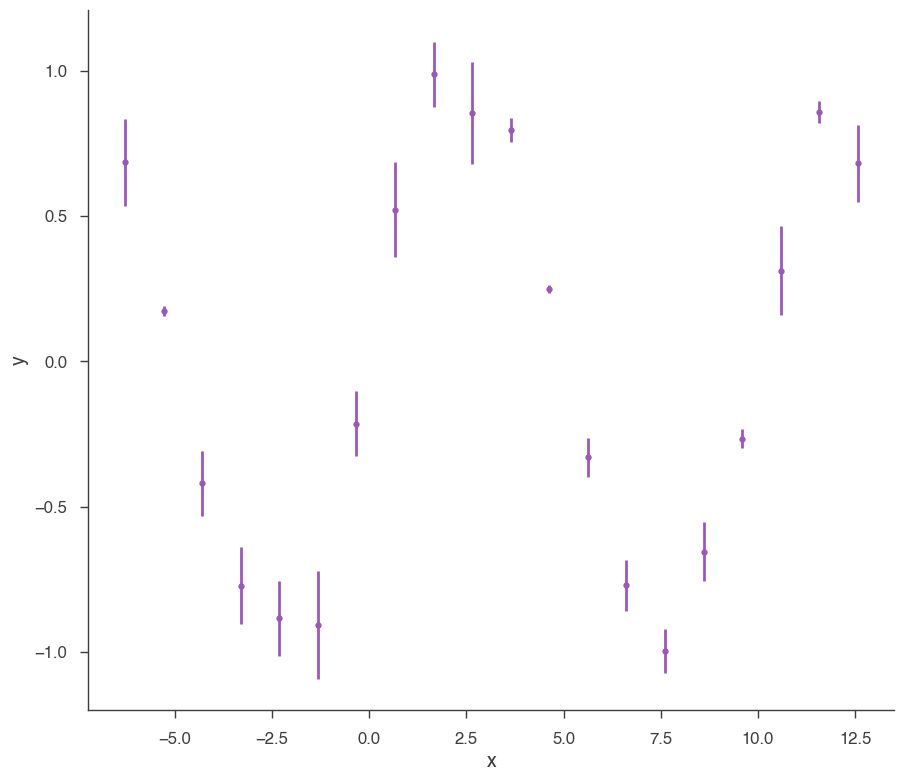

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=133557;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=844643;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

21:34:44 INFO      Mean acceptance fraction: 0.7112                                            ]8;id=772956;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=428013;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=457295;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=716965;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

21:34:45 INFO      fit restored to maximum of posterior                                         ]8;id=226714;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=861210;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.002 -0.023 +0.024,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.968 -0.025 +0.026) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.711225
total,-7.711225


Values of statistical measures:

,statistical measures
AIC,20.128332
BIC,21.413915
DIC,19.355913
PDIC,1.966289


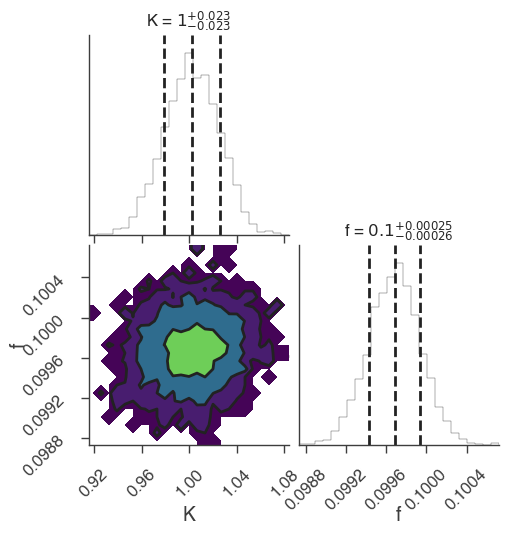

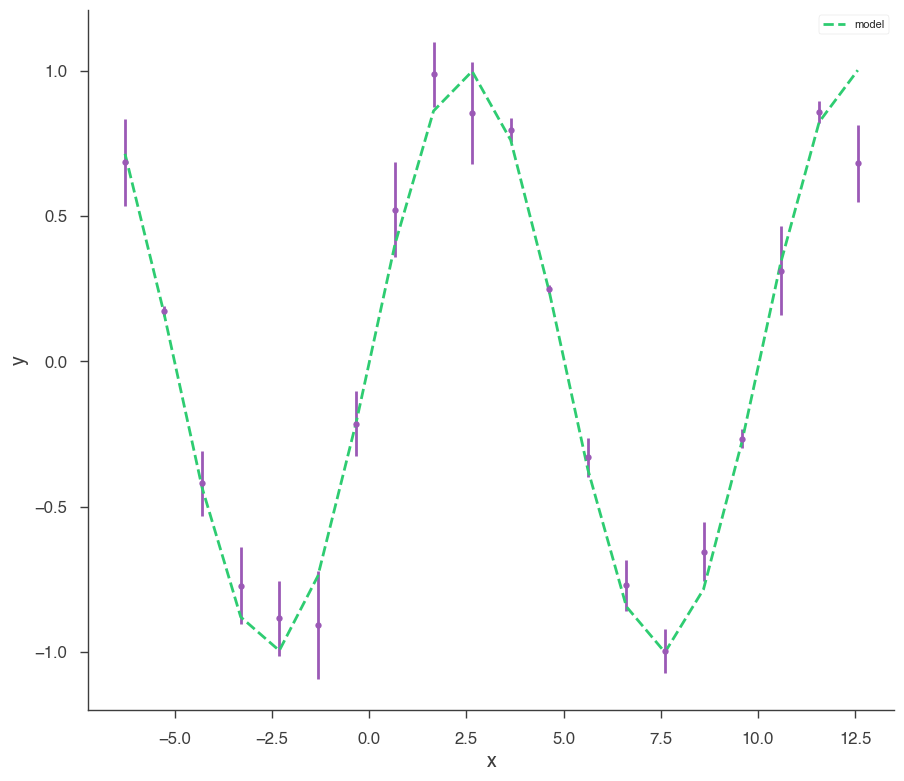

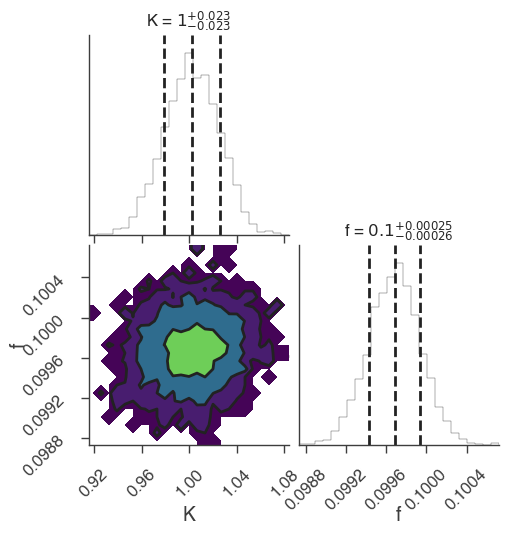

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

         INFO      sampler set to multinest                                                ]8;id=94110;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=629318;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


  analysing data from chains/fit-.txt ln(ev)=  -17.273050735622686      +/-  0.14614904848402743     
 Total Likelihood Evaluations:         6354
 Sampling finished. Exiting MultiNest



21:34:47 INFO      fit restored to maximum of posterior                                         ]8;id=434617;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=467287;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=747695;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=424291;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.001 -0.021 +0.023,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.967 -0.028 +0.030) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.712639
total,-7.712639


Values of statistical measures:

,statistical measures
AIC,20.131160
BIC,21.416743
DIC,19.482007
PDIC,2.029519
log(Z),-7.501591


         INFO      deleting the chain directory chains                                     ]8;id=552140;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=416345;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

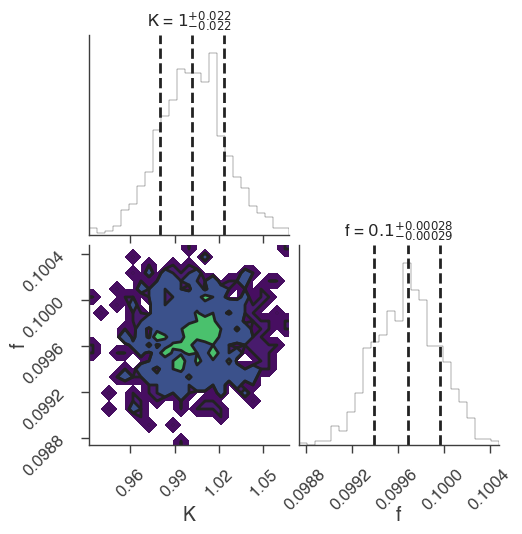

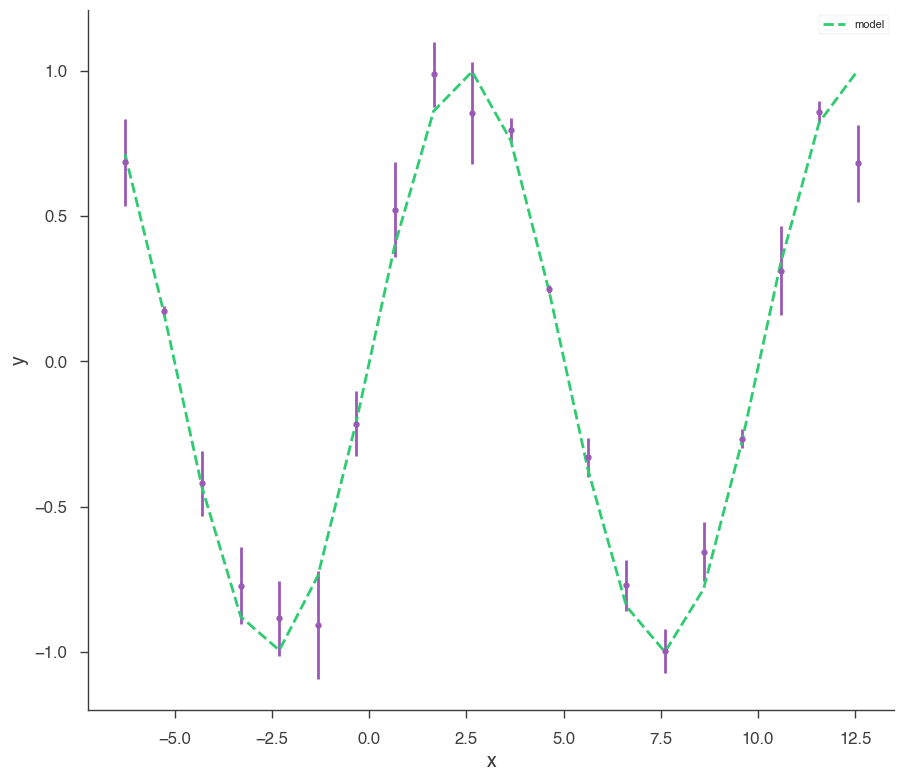

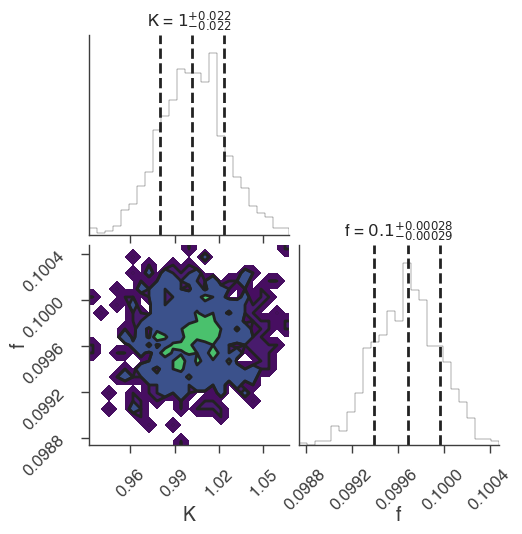

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

         INFO      sampler set to dynesty_nested                                           ]8;id=557271;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=754026;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

212it [00:00, 2114.52it/s, bound: 0 | nc: 1 | ncall: 667 | eff(%): 31.784 | loglstar:   -inf < -3856.111 <    inf | logz: -3863.325 +/-  0.134 | dlogz: 3847.367 >  0.409]

424it [00:00, 1881.15it/s, bound: 0 | nc: 2 | ncall: 1128 | eff(%): 37.589 | loglstar:   -inf < -2519.811 <    inf | logz: -2527.554 +/-  0.139 | dlogz: 2510.387 >  0.409]

614it [00:00, 1735.80it/s, bound: 0 | nc: 1 | ncall: 1804 | eff(%): 34.035 | loglstar:   -inf < -1904.426 <    inf | logz: -1912.639 +/-  0.143 | dlogz: 1905.804 >  0.409]

790it [00:00, 1267.57it/s, bound: 0 | nc: 3 | ncall: 3026 | eff(%): 26.107 | loglstar:   -inf < -1378.943 <    inf | logz: -1387.599 +/-  0.147 | dlogz: 1381.649 >  0.409]

930it [00:00, 1061.97it/s, bound: 0 | nc: 2 | ncall: 4367 | eff(%): 21.296 | loglstar:   -inf < -1065.197 <    inf | logz: -1073.401 +/-  0.139 | dlogz: 1060.978 >  0.409]

1047it [00:00, 785.85it/s, bound: 0 | nc: 4 | ncall: 6146 | eff(%): 17.035 | loglstar:   -inf < -949.774 <    inf | logz: -956.723 +/-  0.124 | dlogz: 946.503 >  0.409]   

1140it [00:01, 658.74it/s, bound: 0 | nc: 11 | ncall: 7676 | eff(%): 14.851 | loglstar:   -inf < -807.356 <    inf | logz: -816.087 +/-  0.142 | dlogz: 806.411 >  0.409]

1217it [00:01, 552.69it/s, bound: 0 | nc: 1 | ncall: 9344 | eff(%): 13.024 | loglstar:   -inf < -714.742 <    inf | logz: -723.071 +/-  0.139 | dlogz: 712.873 >  0.409] 

1280it [00:01, 476.61it/s, bound: 0 | nc: 1 | ncall: 10817 | eff(%): 11.833 | loglstar:   -inf < -571.302 <    inf | logz: -580.076 +/-  0.146 | dlogz: 570.090 >  0.409]

1333it [00:01, 441.05it/s, bound: 0 | nc: 57 | ncall: 12065 | eff(%): 11.048 | loglstar:   -inf < -443.500 <    inf | logz: -453.084 +/-  0.150 | dlogz: 443.679 >  0.409]

1380it [00:02, 352.37it/s, bound: 0 | nc: 17 | ncall: 13758 | eff(%): 10.031 | loglstar:   -inf < -375.273 <    inf | logz: -384.748 +/-  0.148 | dlogz: 374.745 >  0.409]

1419it [00:02, 323.17it/s, bound: 1 | nc: 1 | ncall: 13923 | eff(%): 10.192 | loglstar:   -inf < -331.983 <    inf | logz: -341.405 +/-  0.145 | dlogz: 331.019 >  0.409] 

1575it [00:02, 548.01it/s, bound: 1 | nc: 4 | ncall: 14181 | eff(%): 11.106 | loglstar:   -inf < -232.674 <    inf | logz: -241.106 +/-  0.140 | dlogz: 229.635 >  0.409]

1687it [00:02, 537.17it/s, bound: 2 | nc: 1 | ncall: 14479 | eff(%): 11.651 | loglstar:   -inf < -178.302 <    inf | logz: -187.277 +/-  0.142 | dlogz: 175.641 >  0.409]

1893it [00:02, 829.70it/s, bound: 2 | nc: 1 | ncall: 14749 | eff(%): 12.835 | loglstar:   -inf < -119.062 <    inf | logz: -128.062 +/-  0.146 | dlogz: 115.806 >  0.409]

2050it [00:02, 768.19it/s, bound: 3 | nc: 1 | ncall: 15084 | eff(%): 13.591 | loglstar:   -inf < -84.017 <    inf | logz: -93.558 +/-  0.146 | dlogz: 80.903 >  0.409]   

2223it [00:02, 953.11it/s, bound: 3 | nc: 3 | ncall: 15342 | eff(%): 14.490 | loglstar:   -inf < -57.479 <    inf | logz: -66.756 +/-  0.145 | dlogz: 53.588 >  0.409]

2366it [00:03, 1052.88it/s, bound: 3 | nc: 6 | ncall: 15662 | eff(%): 15.107 | loglstar:   -inf < -43.767 <    inf | logz: -52.722 +/-  0.142 | dlogz: 39.145 >  0.409]

2492it [00:03, 868.54it/s, bound: 4 | nc: 1 | ncall: 15822 | eff(%): 15.750 | loglstar:   -inf < -34.402 <    inf | logz: -43.843 +/-  0.145 | dlogz: 29.962 >  0.409] 

2674it [00:03, 1067.75it/s, bound: 4 | nc: 1 | ncall: 16142 | eff(%): 16.565 | loglstar:   -inf < -26.689 <    inf | logz: -36.010 +/-  0.144 | dlogz: 21.646 >  0.409]

2803it [00:03, 950.41it/s, bound: 5 | nc: 1 | ncall: 16366 | eff(%): 17.127 | loglstar:   -inf < -21.894 <    inf | logz: -31.596 +/-  0.146 | dlogz: 16.911 >  0.409] 

3017it [00:03, 1210.15it/s, bound: 5 | nc: 2 | ncall: 16716 | eff(%): 18.049 | loglstar:   -inf < -16.110 <    inf | logz: -25.738 +/-  0.147 | dlogz: 10.501 >  0.409]

3160it [00:03, 1012.05it/s, bound: 6 | nc: 1 | ncall: 16973 | eff(%): 18.618 | loglstar:   -inf < -13.572 <    inf | logz: -23.215 +/-  0.147 | dlogz:  7.616 >  0.409]

3330it [00:03, 1156.88it/s, bound: 6 | nc: 2 | ncall: 17221 | eff(%): 19.337 | loglstar:   -inf < -11.438 <    inf | logz: -21.252 +/-  0.147 | dlogz:  5.231 >  0.409]

3465it [00:04, 974.09it/s, bound: 7 | nc: 1 | ncall: 17506 | eff(%): 19.793 | loglstar:   -inf < -10.374 <    inf | logz: -20.056 +/-  0.147 | dlogz:  3.726 >  0.409] 

3685it [00:04, 1234.39it/s, bound: 7 | nc: 3 | ncall: 17827 | eff(%): 20.671 | loglstar:   -inf < -9.184 <    inf | logz: -18.856 +/-  0.147 | dlogz:  2.083 >  0.409]

3832it [00:04, 1092.67it/s, bound: 8 | nc: 1 | ncall: 18112 | eff(%): 21.157 | loglstar:   -inf < -8.759 <    inf | logz: -18.377 +/-  0.147 | dlogz:  1.388 >  0.409]

4048it [00:04, 1327.63it/s, bound: 8 | nc: 2 | ncall: 18412 | eff(%): 21.986 | loglstar:   -inf < -8.322 <    inf | logz: -17.945 +/-  0.147 | dlogz:  0.760 >  0.409]

4202it [00:04, 1150.60it/s, bound: 9 | nc: 1 | ncall: 18711 | eff(%): 22.457 | loglstar:   -inf < -8.139 <    inf | logz: -17.750 +/-  0.147 | dlogz:  0.494 >  0.409]

4269it [00:04, 888.07it/s, +400 | bound: 9 | nc: 1 | ncall: 19188 | eff(%): 24.851 | loglstar:   -inf < -7.710 <    inf | logz: -17.336 +/-  0.147 | dlogz:  0.001 >  0.409]

21:34:52 INFO      fit restored to maximum of posterior                                         ]8;id=149300;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=239064;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=999329;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=717273;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.002 -0.022 +0.023,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.967 -0.026 +0.027) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.711237
total,-7.711237


Values of statistical measures:

,statistical measures
AIC,20.128356
BIC,21.413938
DIC,19.387834
PDIC,1.982629
log(Z),-7.528871


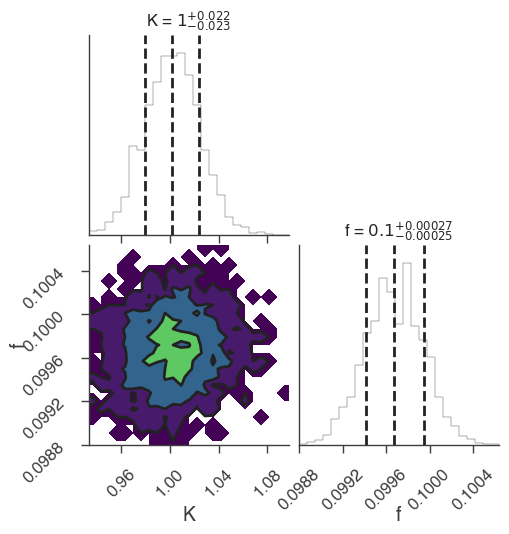

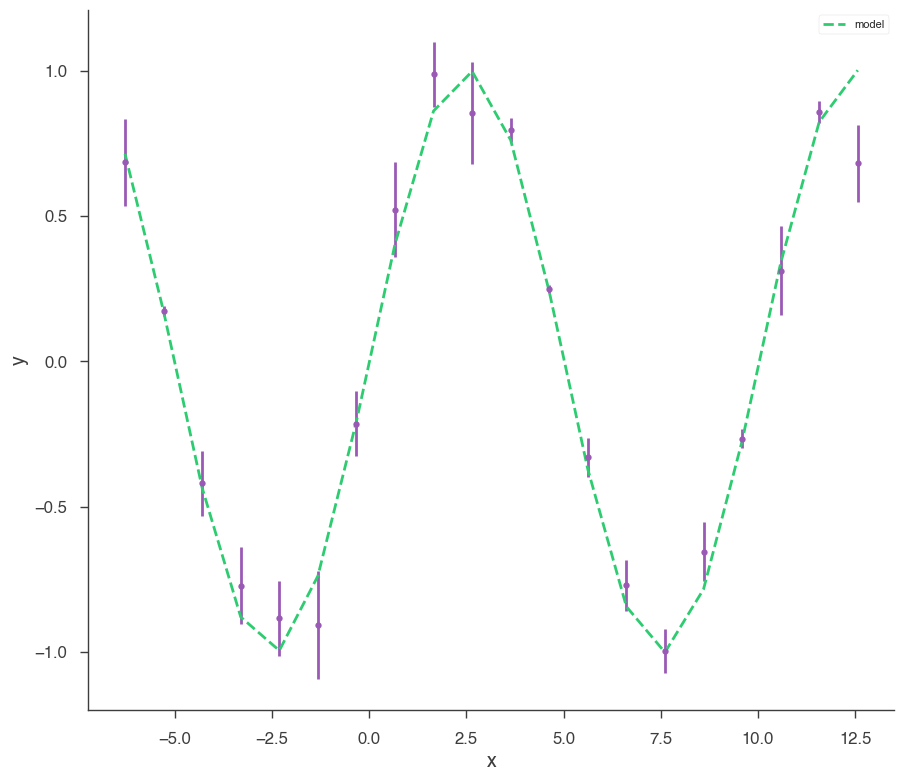

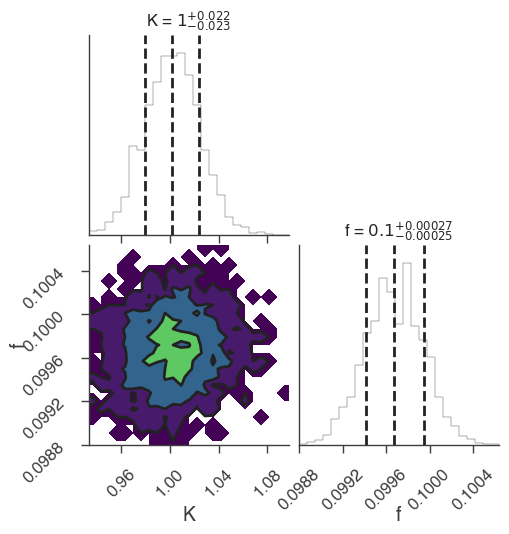

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

21:34:53 INFO      sampler set to dynesty_dynamic                                          ]8;id=233547;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=52998;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

132it [00:00, 1319.23it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 155 | eff(%): 20.153 | loglstar:   -inf < -5319.514 <    inf | logz: -5326.674 +/-  0.119 | dlogz: 5296.415 >  0.010]

323it [00:00, 1662.96it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 447 | eff(%): 34.108 | loglstar:   -inf < -3309.714 <    inf | logz: -3317.266 +/-  0.123 | dlogz: 3289.617 >  0.010]

490it [00:00, 1521.80it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 831 | eff(%): 36.814 | loglstar:   -inf < -2590.689 <    inf | logz: -2598.512 +/-  0.123 | dlogz: 2566.462 >  0.010]

644it [00:00, 1391.37it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 1355 | eff(%): 34.717 | loglstar:   -inf < -2154.907 <    inf | logz: -2162.972 +/-  0.124 | dlogz: 2131.630 >  0.010]

785it [00:00, 1215.23it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 1943 | eff(%): 32.133 | loglstar:   -inf < -1853.775 <    inf | logz: -1861.672 +/-  0.121 | dlogz: 1841.938 >  0.010]

910it [00:00, 1095.65it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 2637 | eff(%): 29.009 | loglstar:   -inf < -1560.273 <    inf | logz: -1568.614 +/-  0.124 | dlogz: 1551.356 >  0.010]

1023it [00:00, 1027.89it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 3471 | eff(%): 25.762 | loglstar:   -inf < -1365.456 <    inf | logz: -1373.640 +/-  0.124 | dlogz: 1355.682 >  0.010]

1128it [00:01, 832.78it/s, batch: 0 | bound: 0 | nc: 20 | ncall: 4420 | eff(%): 22.927 | loglstar:   -inf < -1192.071 <    inf | logz: -1200.544 +/-  0.125 | dlogz: 1183.785 >  0.010]

1217it [00:01, 778.84it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 5313 | eff(%): 20.936 | loglstar:   -inf < -1068.463 <    inf | logz: -1076.597 +/-  0.122 | dlogz: 1059.057 >  0.010] 

1299it [00:01, 727.96it/s, batch: 0 | bound: 0 | nc: 14 | ncall: 6279 | eff(%): 19.162 | loglstar:   -inf < -977.489 <    inf | logz: -985.300 +/-  0.119 | dlogz: 967.403 >  0.010]  

1374it [00:01, 677.16it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 7241 | eff(%): 17.750 | loglstar:   -inf < -948.080 <    inf | logz: -954.782 +/-  0.111 | dlogz: 936.430 >  0.010] 

1443it [00:01, 539.45it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 8475 | eff(%): 16.078 | loglstar:   -inf < -862.173 <    inf | logz: -870.878 +/-  0.127 | dlogz: 852.984 >  0.010]

1502it [00:01, 476.49it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 9801 | eff(%): 14.581 | loglstar:   -inf < -798.821 <    inf | logz: -807.473 +/-  0.126 | dlogz: 789.434 >  0.010] 

1553it [00:01, 453.98it/s, batch: 0 | bound: 0 | nc: 28 | ncall: 10618 | eff(%): 13.968 | loglstar:   -inf < -743.436 <    inf | logz: -753.012 +/-  0.131 | dlogz: 741.233 >  0.010]

1601it [00:02, 379.85it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 11790 | eff(%): 13.027 | loglstar:   -inf < -683.662 <    inf | logz: -692.998 +/-  0.134 | dlogz: 681.117 >  0.010] 

1644it [00:02, 387.06it/s, batch: 0 | bound: 0 | nc: 79 | ncall: 12670 | eff(%): 12.483 | loglstar:   -inf < -593.083 <    inf | logz: -602.782 +/-  0.133 | dlogz: 590.824 >  0.010]

1685it [00:02, 370.30it/s, batch: 0 | bound: 0 | nc: 13 | ncall: 13577 | eff(%): 11.970 | loglstar:   -inf < -527.413 <    inf | logz: -536.728 +/-  0.129 | dlogz: 524.170 >  0.010]

1724it [00:02, 322.99it/s, batch: 0 | bound: 0 | nc: 90 | ncall: 14728 | eff(%): 11.321 | loglstar:   -inf < -485.110 <    inf | logz: -494.756 +/-  0.134 | dlogz: 482.605 >  0.010]

1758it [00:02, 311.60it/s, batch: 0 | bound: 0 | nc: 15 | ncall: 15514 | eff(%): 10.978 | loglstar:   -inf < -443.367 <    inf | logz: -453.059 +/-  0.131 | dlogz: 440.584 >  0.010]

1790it [00:02, 283.75it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 16398 | eff(%): 10.593 | loglstar:   -inf < -414.375 <    inf | logz: -423.713 +/-  0.133 | dlogz: 410.876 >  0.010] 

1819it [00:02, 259.60it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 17346 | eff(%): 10.193 | loglstar:   -inf < -377.641 <    inf | logz: -387.282 +/-  0.133 | dlogz: 374.650 >  0.010]

1846it [00:03, 214.13it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 17848 | eff(%): 10.061 | loglstar:   -inf < -354.509 <    inf | logz: -364.092 +/-  0.133 | dlogz: 351.226 >  0.010]

2046it [00:03, 593.10it/s, batch: 0 | bound: 1 | nc: 3 | ncall: 18174 | eff(%): 10.956 | loglstar:   -inf < -240.750 <    inf | logz: -249.756 +/-  0.128 | dlogz: 238.156 >  0.010]

2211it [00:03, 837.04it/s, batch: 0 | bound: 1 | nc: 6 | ncall: 18526 | eff(%): 11.621 | loglstar:   -inf < -183.654 <    inf | logz: -193.024 +/-  0.129 | dlogz: 181.114 >  0.010]

2313it [00:03, 729.64it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18690 | eff(%): 12.053 | loglstar:   -inf < -156.741 <    inf | logz: -166.161 +/-  0.132 | dlogz: 154.016 >  0.010]

2498it [00:03, 983.92it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 19027 | eff(%): 12.793 | loglstar:   -inf < -113.866 <    inf | logz: -123.230 +/-  0.128 | dlogz: 110.612 >  0.010]

2640it [00:03, 785.68it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19338 | eff(%): 13.308 | loglstar:   -inf < -89.877 <    inf | logz: -99.621 +/-  0.131 | dlogz: 86.727 >  0.010]   

2862it [00:04, 1073.87it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 19624 | eff(%): 14.222 | loglstar:   -inf < -62.104 <    inf | logz: -72.124 +/-  0.132 | dlogz: 58.758 >  0.010]

3037it [00:04, 1223.09it/s, batch: 0 | bound: 3 | nc: 6 | ncall: 19973 | eff(%): 14.834 | loglstar:   -inf < -46.431 <    inf | logz: -56.215 +/-  0.132 | dlogz: 42.451 >  0.010]

3184it [00:04, 1023.52it/s, batch: 0 | bound: 4 | nc: 3 | ncall: 20215 | eff(%): 15.371 | loglstar:   -inf < -37.738 <    inf | logz: -47.250 +/-  0.131 | dlogz: 33.157 >  0.010]

3423it [00:04, 1318.37it/s, batch: 0 | bound: 4 | nc: 3 | ncall: 20596 | eff(%): 16.226 | loglstar:   -inf < -25.493 <    inf | logz: -35.269 +/-  0.132 | dlogz: 20.690 >  0.010]

3582it [00:04, 1060.34it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20905 | eff(%): 16.734 | loglstar:   -inf < -21.143 <    inf | logz: -30.658 +/-  0.131 | dlogz: 15.745 >  0.010]

3787it [00:04, 1263.01it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 21221 | eff(%): 17.435 | loglstar:   -inf < -16.974 <    inf | logz: -26.693 +/-  0.132 | dlogz: 11.391 >  0.010]

3962it [00:04, 1373.12it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 21569 | eff(%): 17.953 | loglstar:   -inf < -14.133 <    inf | logz: -23.942 +/-  0.133 | dlogz:  8.287 >  0.010]

4123it [00:05, 1117.80it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21775 | eff(%): 18.510 | loglstar:   -inf < -12.546 <    inf | logz: -22.278 +/-  0.132 | dlogz:  6.325 >  0.010]

4310it [00:05, 1278.23it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 22090 | eff(%): 19.079 | loglstar:   -inf < -10.937 <    inf | logz: -20.757 +/-  0.133 | dlogz:  4.453 >  0.010]

4461it [00:05, 1002.57it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22382 | eff(%): 19.496 | loglstar:   -inf < -10.128 <    inf | logz: -19.907 +/-  0.133 | dlogz:  3.325 >  0.010]

4672it [00:05, 1222.64it/s, batch: 0 | bound: 7 | nc: 6 | ncall: 22671 | eff(%): 20.163 | loglstar:   -inf < -9.326 <    inf | logz: -19.095 +/-  0.132 | dlogz:  2.175 >  0.010] 

4835it [00:05, 1312.32it/s, batch: 0 | bound: 7 | nc: 6 | ncall: 23033 | eff(%): 20.546 | loglstar:   -inf < -8.829 <    inf | logz: -18.651 +/-  0.133 | dlogz:  1.528 >  0.010]

4989it [00:05, 1039.61it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 23250 | eff(%): 21.006 | loglstar:   -inf < -8.494 <    inf | logz: -18.336 +/-  0.133 | dlogz:  1.077 >  0.010]

5217it [00:05, 1297.11it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 23663 | eff(%): 21.591 | loglstar:   -inf < -8.213 <    inf | logz: -18.022 +/-  0.133 | dlogz:  0.640 >  0.010]

5375it [00:06, 1125.85it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23932 | eff(%): 22.000 | loglstar:   -inf < -8.083 <    inf | logz: -17.877 +/-  0.133 | dlogz:  0.448 >  0.010]

5574it [00:06, 1308.83it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 24245 | eff(%): 22.526 | loglstar:   -inf < -7.965 <    inf | logz: -17.750 +/-  0.133 | dlogz:  0.289 >  0.010]

5729it [00:06, 866.51it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 24602 | eff(%): 22.823 | loglstar:   -inf < -7.894 <    inf | logz: -17.682 +/-  0.133 | dlogz:  0.206 >  0.010]

5889it [00:06, 993.77it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 24789 | eff(%): 23.287 | loglstar:   -inf < -7.842 <    inf | logz: -17.630 +/-  0.133 | dlogz:  0.147 >  0.010]

6032it [00:06, 1080.59it/s, batch: 0 | bound: 10 | nc: 5 | ncall: 25042 | eff(%): 23.616 | loglstar:   -inf < -7.809 <    inf | logz: -17.595 +/-  0.133 | dlogz:  0.109 >  0.010]

6168it [00:07, 871.04it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25356 | eff(%): 23.855 | loglstar:   -inf < -7.787 <    inf | logz: -17.571 +/-  0.133 | dlogz:  0.082 >  0.010] 

6280it [00:07, 902.51it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25493 | eff(%): 24.160 | loglstar:   -inf < -7.774 <    inf | logz: -17.555 +/-  0.133 | dlogz:  0.065 >  0.010]

6465it [00:07, 1103.91it/s, batch: 0 | bound: 11 | nc: 3 | ncall: 25775 | eff(%): 24.605 | loglstar:   -inf < -7.754 <    inf | logz: -17.535 +/-  0.133 | dlogz:  0.045 >  0.010]

6597it [00:07, 807.23it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 26072 | eff(%): 24.827 | loglstar:   -inf < -7.743 <    inf | logz: -17.525 +/-  0.133 | dlogz:  0.034 >  0.010] 

6703it [00:07, 574.85it/s, batch: 0 | bound: 12 | nc: 2 | ncall: 26217 | eff(%): 25.089 | loglstar:   -inf < -7.738 <    inf | logz: -17.519 +/-  0.133 | dlogz:  0.027 >  0.010]

6890it [00:07, 774.02it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 26484 | eff(%): 25.534 | loglstar:   -inf < -7.731 <    inf | logz: -17.511 +/-  0.133 | dlogz:  0.019 >  0.010]

7043it [00:08, 909.85it/s, batch: 0 | bound: 12 | nc: 4 | ncall: 26785 | eff(%): 25.813 | loglstar:   -inf < -7.725 <    inf | logz: -17.506 +/-  0.133 | dlogz:  0.014 >  0.010]

7169it [00:08, 813.89it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 26971 | eff(%): 26.097 | loglstar:   -inf < -7.722 <    inf | logz: -17.503 +/-  0.133 | dlogz:  0.011 >  0.010]

7684it [00:08, 1659.86it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 27499 | eff(%): 27.923 | loglstar:   -inf < -7.710 <    inf | logz: -17.492 +/-  0.133 | dlogz:  0.000 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7914it [00:09, 674.18it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 27811 | eff(%): 27.942 | loglstar: -9.384 < -8.792 < -8.199 | logz: -17.492 +/-  0.136 | stop:  1.417]            

8083it [00:09, 779.28it/s, batch: 1 | bound: 2 | nc: 3 | ncall: 28143 | eff(%): 28.208 | loglstar: -9.384 < -8.492 < -8.199 | logz: -17.492 +/-  0.136 | stop:  1.417]

8251it [00:09, 773.36it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28415 | eff(%): 28.524 | loglstar: -9.384 < -8.253 < -8.199 | logz: -17.492 +/-  0.136 | stop:  1.417]

8665it [00:09, 1237.50it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28870 | eff(%): 29.863 | loglstar: -9.384 < -7.847 < -8.199 | logz: -17.492 +/-  0.136 | stop:  1.417]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8888it [00:10, 576.84it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29111 | eff(%): 29.966 | loglstar: -9.912 < -9.605 < -9.381 | logz: -17.498 +/-  0.113 | stop:  1.113] 

9426it [00:10, 1000.75it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29719 | eff(%): 31.696 | loglstar: -9.912 < -7.780 < -9.381 | logz: -17.498 +/-  0.113 | stop:  1.113]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9702it [00:11, 599.64it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 30020 | eff(%): 31.951 | loglstar: -10.367 < -9.192 < -9.911 | logz: -17.500 +/-  0.105 | stop:  1.073]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



10038it [00:12, 562.43it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 30365 | eff(%): 33.058 | loglstar: -10.367 < -7.714 < -9.911 | logz: -17.500 +/-  0.105 | stop:  0.869]

10038it [00:12, 809.09it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 30365 | eff(%): 33.058 | loglstar: -10.367 < -7.714 < -9.911 | logz: -17.500 +/-  0.105 | stop:  0.869]

21:35:06 INFO      fit restored to maximum of posterior                                         ]8;id=563177;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=584137;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=352016;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=706751;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.002 -0.022 +0.023,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.968 -0.027 +0.026) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.711254
total,-7.711254


Values of statistical measures:

,statistical measures
AIC,20.128389
BIC,21.413972
DIC,19.400741
PDIC,1.989119
log(Z),-7.600641


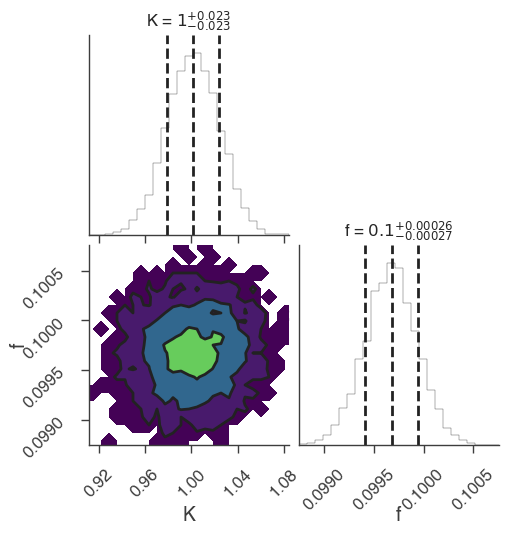

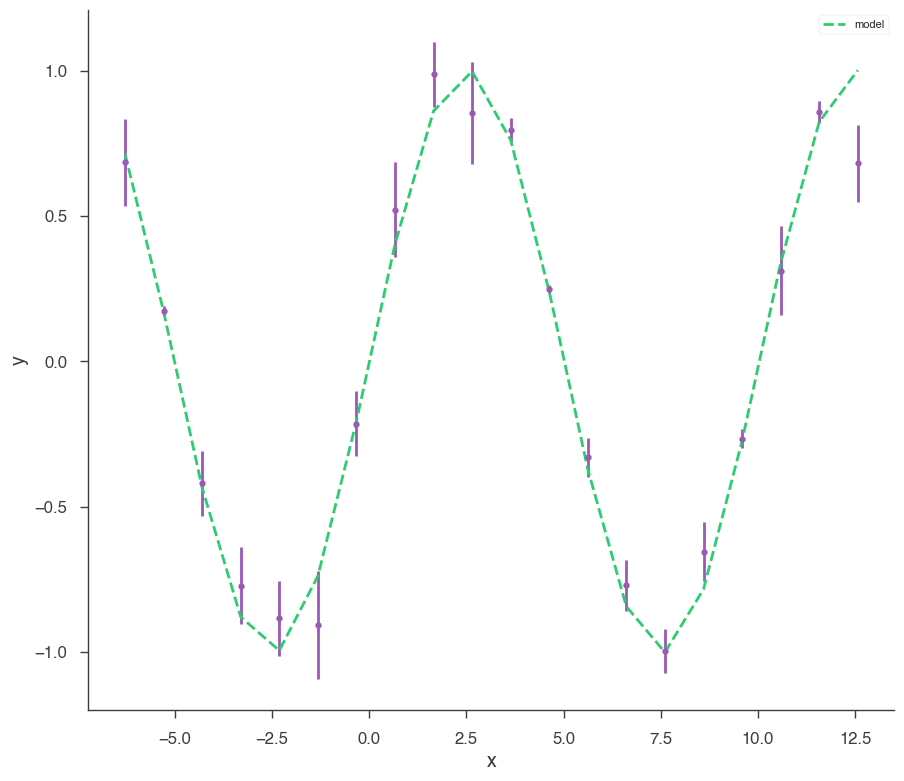

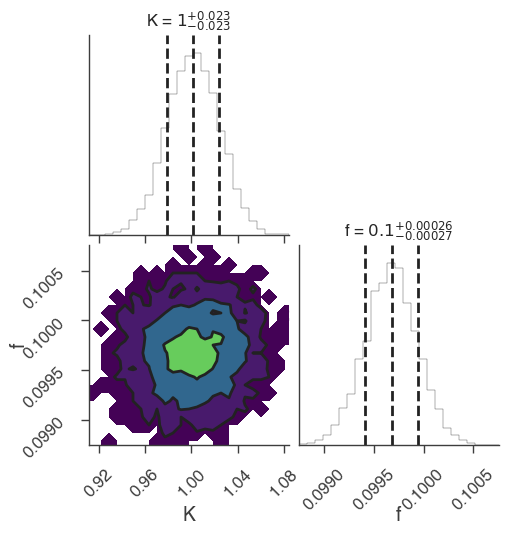

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

21:35:07 INFO      sampler set to zeus                                                     ]8;id=935176;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=154668;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 5/625 [00:00<00:14, 42.76it/s]

Sampling progress :   2%|▏         | 10/625 [00:00<00:13, 46.21it/s]

Sampling progress :   3%|▎         | 17/625 [00:00<00:11, 53.68it/s]

Sampling progress :   4%|▎         | 23/625 [00:00<00:11, 53.50it/s]

Sampling progress :   5%|▍         | 30/625 [00:00<00:10, 58.94it/s]

Sampling progress :   6%|▌         | 36/625 [00:00<00:10, 57.46it/s]

Sampling progress :   7%|▋         | 43/625 [00:00<00:09, 60.78it/s]

Sampling progress :   8%|▊         | 50/625 [00:00<00:10, 56.75it/s]

Sampling progress :   9%|▉         | 57/625 [00:00<00:09, 60.29it/s]

Sampling progress :  10%|█         | 64/625 [00:01<00:09, 59.23it/s]

Sampling progress :  11%|█         | 70/625 [00:01<00:09, 57.83it/s]

Sampling progress :  12%|█▏        | 76/625 [00:01<00:13, 39.24it/s]

Sampling progress :  13%|█▎        | 83/625 [00:01<00:11, 45.22it/s]

Sampling progress :  14%|█▍        | 90/625 [00:01<00:10, 49.94it/s]

Sampling progress :  15%|█▌        | 96/625 [00:01<00:13, 39.98it/s]

Sampling progress :  16%|█▋        | 102/625 [00:02<00:12, 43.18it/s]

Sampling progress :  17%|█▋        | 109/625 [00:02<00:10, 48.00it/s]

Sampling progress :  19%|█▊        | 116/625 [00:02<00:09, 51.52it/s]

Sampling progress :  20%|█▉        | 123/625 [00:02<00:09, 55.08it/s]

Sampling progress :  21%|██        | 129/625 [00:02<00:09, 52.65it/s]

Sampling progress :  22%|██▏       | 135/625 [00:02<00:09, 49.45it/s]

Sampling progress :  23%|██▎       | 141/625 [00:02<00:09, 50.97it/s]

Sampling progress :  24%|██▎       | 148/625 [00:02<00:08, 54.42it/s]

Sampling progress :  25%|██▍       | 154/625 [00:03<00:09, 51.87it/s]

Sampling progress :  26%|██▌       | 160/625 [00:03<00:08, 52.21it/s]

Sampling progress :  27%|██▋       | 166/625 [00:03<00:08, 51.18it/s]

Sampling progress :  28%|██▊       | 172/625 [00:03<00:08, 53.37it/s]

Sampling progress :  29%|██▊       | 179/625 [00:03<00:07, 57.34it/s]

Sampling progress :  30%|██▉       | 186/625 [00:03<00:07, 60.70it/s]

Sampling progress :  31%|███       | 193/625 [00:03<00:07, 58.60it/s]

Sampling progress :  32%|███▏      | 199/625 [00:03<00:07, 58.04it/s]

Sampling progress :  33%|███▎      | 206/625 [00:03<00:06, 60.89it/s]

Sampling progress :  34%|███▍      | 213/625 [00:04<00:07, 58.38it/s]

Sampling progress :  35%|███▌      | 220/625 [00:04<00:06, 60.69it/s]

Sampling progress :  36%|███▋      | 227/625 [00:04<00:06, 59.77it/s]

Sampling progress :  37%|███▋      | 234/625 [00:04<00:06, 61.25it/s]

Sampling progress :  39%|███▊      | 241/625 [00:04<00:06, 58.16it/s]

Sampling progress :  40%|███▉      | 247/625 [00:04<00:06, 56.88it/s]

Sampling progress :  40%|████      | 253/625 [00:04<00:08, 42.89it/s]

Sampling progress :  42%|████▏     | 260/625 [00:04<00:07, 47.74it/s]

Sampling progress :  43%|████▎     | 267/625 [00:05<00:06, 52.79it/s]

Sampling progress :  44%|████▍     | 274/625 [00:05<00:06, 54.95it/s]

Sampling progress :  45%|████▍     | 280/625 [00:05<00:06, 54.91it/s]

Sampling progress :  46%|████▌     | 286/625 [00:05<00:06, 55.72it/s]

Sampling progress :  47%|████▋     | 292/625 [00:05<00:06, 52.62it/s]

Sampling progress :  48%|████▊     | 299/625 [00:05<00:05, 56.97it/s]

Sampling progress :  49%|████▉     | 306/625 [00:05<00:05, 56.84it/s]

Sampling progress :  50%|████▉     | 312/625 [00:05<00:07, 44.26it/s]

Sampling progress :  51%|█████     | 318/625 [00:06<00:06, 47.26it/s]

Sampling progress :  52%|█████▏    | 324/625 [00:06<00:06, 49.55it/s]

Sampling progress :  53%|█████▎    | 331/625 [00:06<00:05, 53.75it/s]

Sampling progress :  54%|█████▍    | 338/625 [00:06<00:05, 55.89it/s]

Sampling progress :  55%|█████▌    | 344/625 [00:06<00:04, 56.85it/s]

Sampling progress :  56%|█████▌    | 350/625 [00:06<00:04, 55.54it/s]

Sampling progress :  57%|█████▋    | 356/625 [00:06<00:04, 54.28it/s]

Sampling progress :  58%|█████▊    | 363/625 [00:06<00:04, 57.09it/s]

Sampling progress :  59%|█████▉    | 370/625 [00:06<00:04, 59.24it/s]

Sampling progress :  60%|██████    | 377/625 [00:07<00:04, 60.46it/s]

Sampling progress :  61%|██████▏   | 384/625 [00:07<00:04, 59.32it/s]

Sampling progress :  62%|██████▏   | 390/625 [00:07<00:03, 59.10it/s]

Sampling progress :  63%|██████▎   | 396/625 [00:07<00:03, 57.34it/s]

Sampling progress :  64%|██████▍   | 402/625 [00:07<00:04, 55.18it/s]

Sampling progress :  65%|██████▌   | 408/625 [00:07<00:04, 51.98it/s]

Sampling progress :  66%|██████▌   | 414/625 [00:07<00:04, 52.41it/s]

Sampling progress :  67%|██████▋   | 420/625 [00:07<00:03, 54.42it/s]

Sampling progress :  68%|██████▊   | 426/625 [00:07<00:03, 54.91it/s]

Sampling progress :  69%|██████▉   | 433/625 [00:08<00:03, 58.53it/s]

Sampling progress :  71%|███████   | 441/625 [00:08<00:02, 63.16it/s]

Sampling progress :  72%|███████▏  | 448/625 [00:08<00:02, 62.41it/s]

Sampling progress :  73%|███████▎  | 455/625 [00:08<00:02, 60.07it/s]

Sampling progress :  74%|███████▍  | 462/625 [00:08<00:02, 57.73it/s]

Sampling progress :  75%|███████▍  | 468/625 [00:08<00:02, 54.25it/s]

Sampling progress :  76%|███████▌  | 474/625 [00:08<00:02, 52.57it/s]

Sampling progress :  77%|███████▋  | 480/625 [00:08<00:02, 53.87it/s]

Sampling progress :  78%|███████▊  | 486/625 [00:08<00:02, 53.21it/s]

Sampling progress :  79%|███████▊  | 492/625 [00:09<00:02, 52.53it/s]

Sampling progress :  80%|███████▉  | 499/625 [00:09<00:02, 56.97it/s]

Sampling progress :  81%|████████  | 505/625 [00:09<00:02, 55.65it/s]

Sampling progress :  82%|████████▏ | 512/625 [00:09<00:01, 58.86it/s]

Sampling progress :  83%|████████▎ | 520/625 [00:09<00:01, 63.65it/s]

Sampling progress :  84%|████████▍ | 527/625 [00:09<00:01, 61.53it/s]

Sampling progress :  85%|████████▌ | 534/625 [00:09<00:01, 60.22it/s]

Sampling progress :  87%|████████▋ | 541/625 [00:09<00:01, 60.79it/s]

Sampling progress :  88%|████████▊ | 549/625 [00:10<00:01, 65.36it/s]

Sampling progress :  89%|████████▉ | 556/625 [00:10<00:01, 64.55it/s]

Sampling progress :  90%|█████████ | 563/625 [00:10<00:00, 65.89it/s]

Sampling progress :  91%|█████████ | 570/625 [00:10<00:00, 65.26it/s]

Sampling progress :  92%|█████████▏| 577/625 [00:10<00:00, 62.89it/s]

Sampling progress :  93%|█████████▎| 584/625 [00:10<00:00, 60.10it/s]

Sampling progress :  95%|█████████▍| 591/625 [00:10<00:00, 58.32it/s]

Sampling progress :  96%|█████████▌| 597/625 [00:10<00:00, 57.60it/s]

Sampling progress :  96%|█████████▋| 603/625 [00:10<00:00, 57.67it/s]

Sampling progress :  98%|█████████▊| 611/625 [00:11<00:00, 63.35it/s]

Sampling progress :  99%|█████████▉| 619/625 [00:11<00:00, 65.98it/s]

Sampling progress : 100%|██████████| 625/625 [00:11<00:00, 55.80it/s]

21:35:19 INFO      fit restored to maximum of posterior                                         ]8;id=894217;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=790781;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=326559;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=426686;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 44


Scale Factor: 1.34706


Mean Integrated Autocorrelation Time: 3.33


Effective Sample Size: 3751.67


Number of Log Probability Evaluations: 64814


Effective Samples per Log Probability Evaluation: 0.057884


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.002 -0.023 +0.021,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.968 -0.028 +0.026) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.711303
total,-7.711303


Values of statistical measures:

,statistical measures
AIC,20.128488
BIC,21.414070
DIC,19.285606
PDIC,1.931198


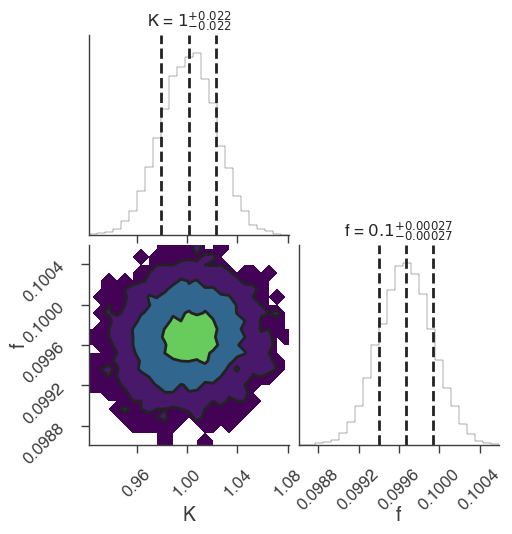

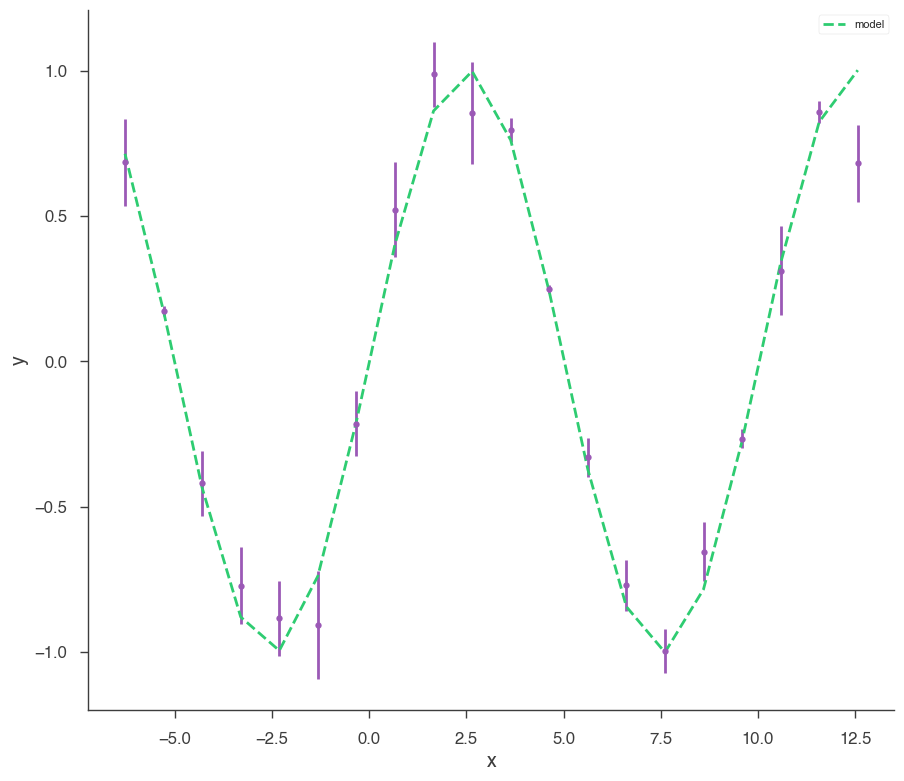

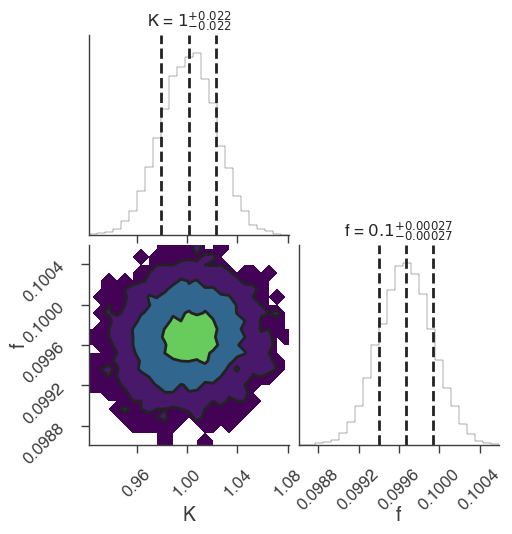

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

21:35:20 INFO      sampler set to ultranest                                                ]8;id=607473;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=97613;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-8  


[ultranest] Likelihood function evaluations: 10194


[ultranest]   logZ = -17.01 +- 0.09287


[ultranest] Effective samples strategy satisfied (ESS = 965.7, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.06 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.14 bs:0.09 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


21:35:29 INFO      fit restored to maximum of posterior                                         ]8;id=158906;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=67165;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=72383;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=933097;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.002 -0.023 +0.024,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.966 -0.026 +0.027) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.712662
total,-7.712662


Values of statistical measures:

,statistical measures
AIC,20.131206
BIC,21.416788
DIC,19.402409
PDIC,1.988829
log(Z),-7.396792


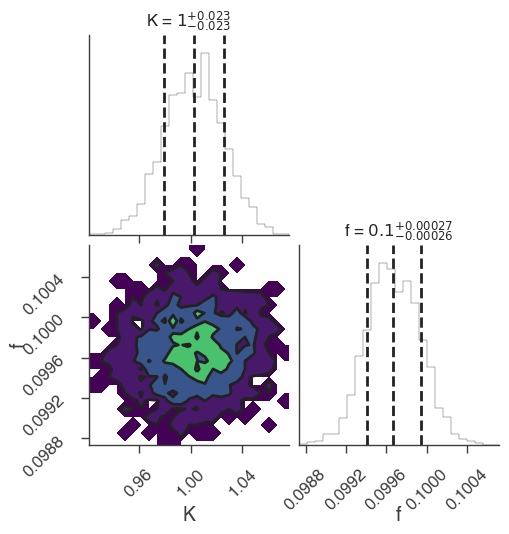

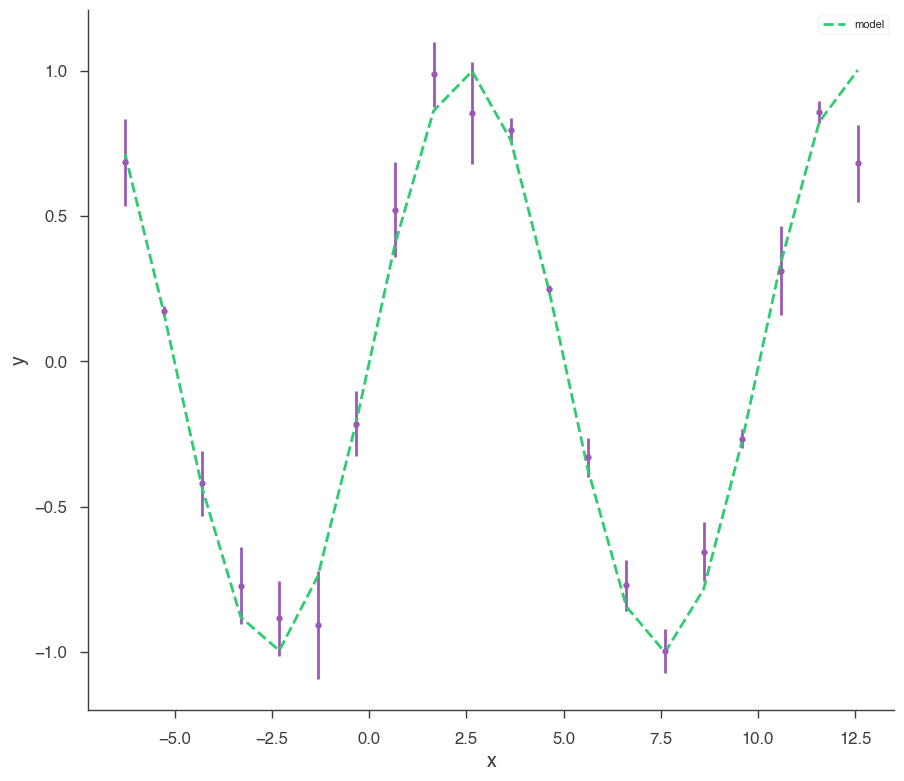

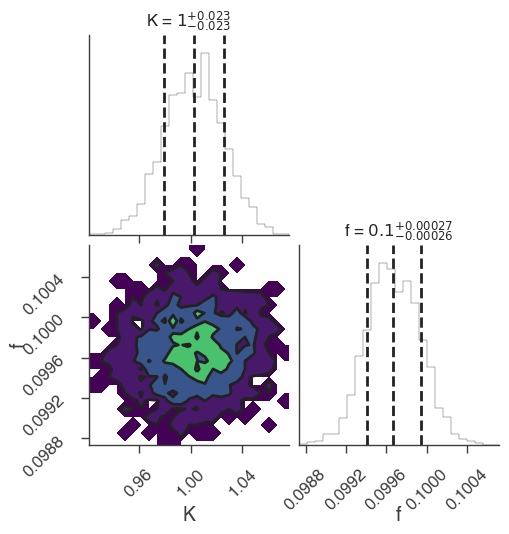

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()